In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc

import os
import time
import sys

from sklearn.externals import joblib

In [2]:
df = pd.read_csv("Life Term Apps since 2017 cleaned.csv")

In [3]:
df.shape

(14449, 19)

In [4]:
df.dtypes

Enrollment_Method        object
App_Source               object
Payment_Method           object
Replacement_Indicator     int64
Final_Status             object
Status                    int64
Gender                   object
Issue_Age                 int64
Age_Group                object
Marital_Status           object
Employment               object
Face_Amount               int64
Earn                      int64
Earnings_Range           object
Business_Bene             int64
Child_Bene                int64
Other_Bene                int64
OthFamily_Bene            int64
Spouse_Bene               int64
dtype: object

In [5]:
df.head(20)

,Enrollment_Method,App_Source,Payment_Method,Replacement_Indicator,Final_Status,Status,Gender,Issue_Age,Age_Group,Marital_Status,Employment,Face_Amount,Earn,Earnings_Range,Business_Bene,Child_Bene,Other_Bene,OthFamily_Bene,Spouse_Bene
0,P,Agent,ETRANS,1,Complete,1,F,42,40-49,SEPARATED,HOMEMAKER,250000,41667,41-60,0,0,0,0,1
1,P,Agent,ETRANS,1,Complete,1,F,38,30-39,CIVILUNION,UNSPEC,250000,41667,41-60,0,2,0,0,0
2,P,Agent,ETRANS,1,Complete,1,F,59,50-59,DIVORCED,RETIRED,100000,16667,0-20K,0,1,0,0,1
3,P,Agent,ETRANS,0,Complete,1,M,53,50-59,DIVORCED,HOMEMAKER,250000,41667,41-60,0,4,0,0,0
4,P,Agent,ETRANS,0,Complete,1,F,43,40-49,DIVORCED,NOTACTIVE,500000,83333,80-100,0,0,0,1,0
5,P,Agent,ETRANS,0,Complete,1,F,43,40-49,DIVORCED,NOTACTIVE,500000,83333,80-100,0,0,0,1,0
6,P,Agent,CREDCARD,0,Complete,1,M,33,30-39,DIVORCED,ACTIVE,1000000,166667,>100,0,1,0,0,0
7,O,Direct,CHECK,0,Complete,1,M,39,30-39,DIVORCED,ACTIVE,1000000,166667,>100,0,1,0,0,0
8,P,Agent,ETRANS,1,Complete,1,F,56,50-59,MARRIED,NOTACTIVE,100000,16667,0-20K,0,0,0,0,1
9,P,Agent,ETRANS,1,Complete,1,F,32,30-39,MARRIED,HOMEMAKER,100000,16667,0-20K,0,0,0,0,1


In [6]:
df.describe()

,Replacement_Indicator,Status,Issue_Age,Face_Amount,Earn,Business_Bene,Child_Bene,Other_Bene,OthFamily_Bene,Spouse_Bene
count,14449.000000,14449.000000,14449.000000,1.444900e+04,1.444900e+04,14449.000000,14449.000000,14449.000000,14449.000000,14449.000000
mean,0.159734,0.720811,45.162987,5.524508e+05,9.834287e+04,0.015572,0.275036,0.033705,0.084573,0.802962
std,0.366372,0.448616,10.183896,5.010568e+05,1.147177e+05,0.125483,0.716104,0.186510,0.356347,0.397775
min,0.000000,0.000000,20.000000,1.000000e+05,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,37.000000,2.500000e+05,4.800000e+04,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,44.000000,5.000000e+05,7.500000e+04,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,53.000000,7.500000e+05,1.180000e+05,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,79.000000,6.000000e+06,4.000000e+06,2.000000,8.000000,3.000000,5.000000,1.000000


# 1. Exploration and Data Cleansing

In [7]:
cat_cols = ["Enrollment_Method", "App_Source", "Payment_Method",
            "Final_Status","Gender",
            "Marital_Status","Employment",
            "Earnings_Range"      ]


In [8]:
num_cols = ["Replacement_Indicator","Status","Issue_Age","Face_Amount","Earn","Business_Bene",
            "Child_Bene", "Other_Bene","OthFamily_Bene","Spouse_Bene"]

# 2. Visualization 

In [9]:
df.Status.value_counts() 

1    10415
0     4034
Name: Status, dtype: int64

In [10]:
df.Status.value_counts() / len(df)

1    0.720811
0    0.279189
Name: Status, dtype: float64

Roughly 72% positive events and 28% negative events.

Text(0.5,1,'Throughput Counts - 1 is Made it to Decsion')

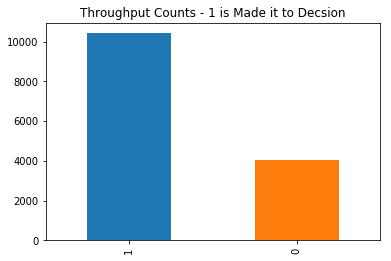

In [11]:
df.Status.value_counts().plot(kind="bar")
plt.title("Throughput Counts - 1 is Made it to Decsion")

# single variable distributions first

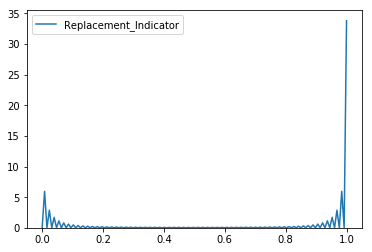

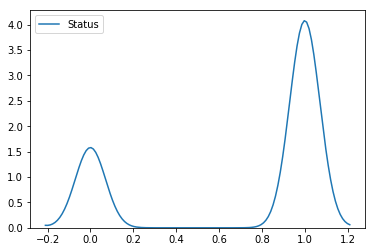

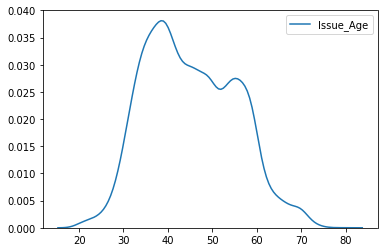

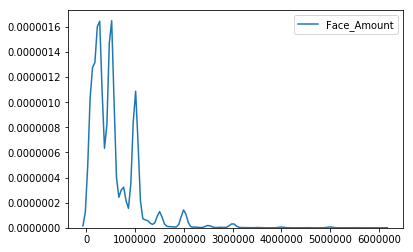

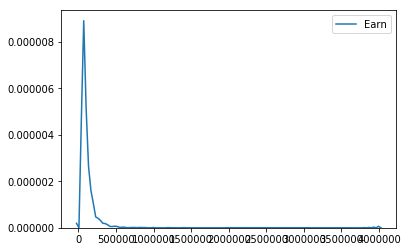

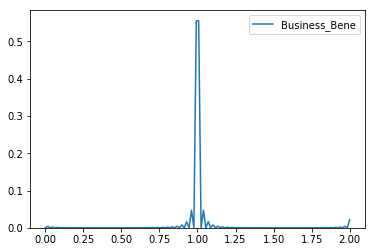

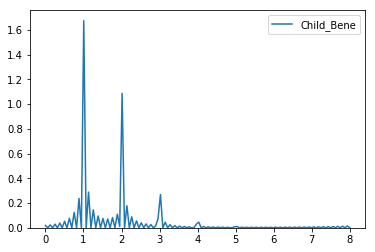

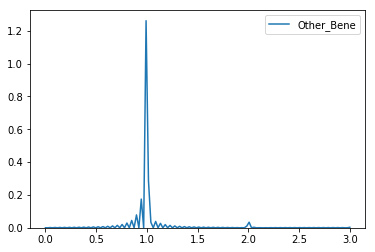

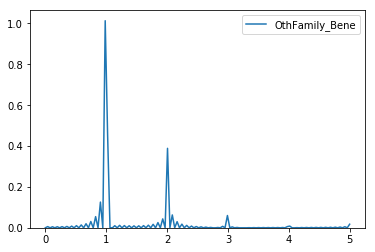

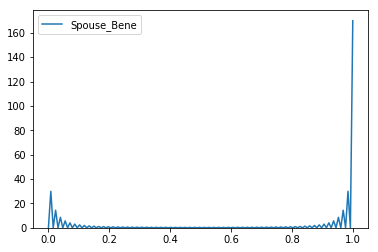

In [12]:
for col in num_cols:
    sns.kdeplot(df[col])
    plt.show()

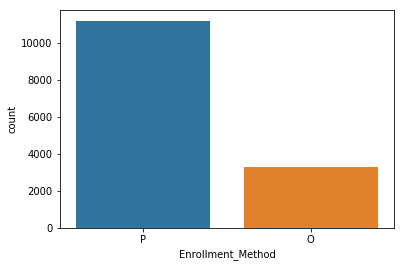

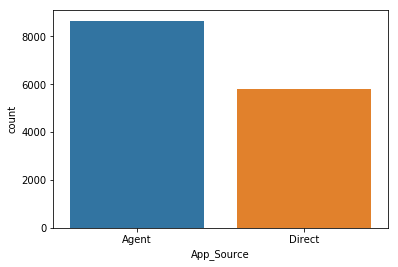

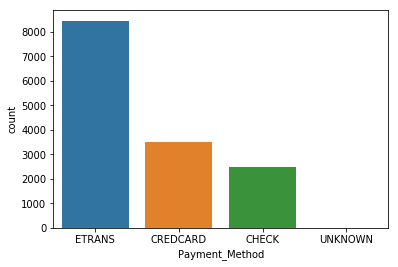

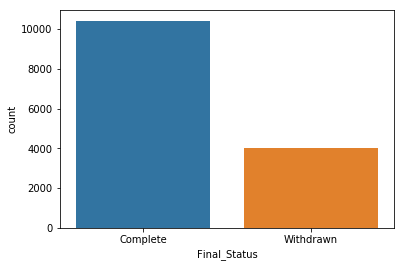

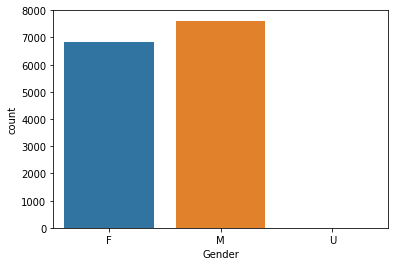

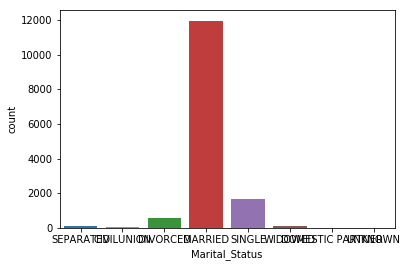

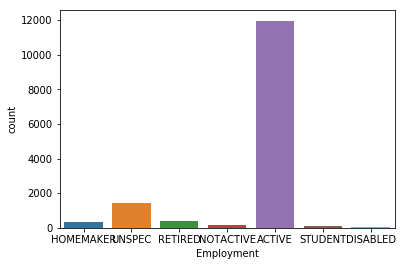

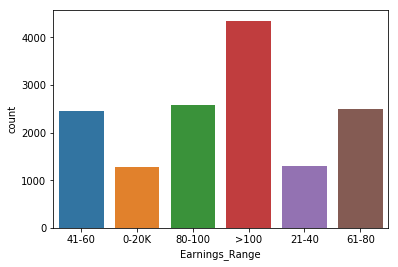

In [13]:
for col in cat_cols:
    sns.countplot(col, data=df)
    plt.show()

# look at univariate and multi-variate relationships against Survival

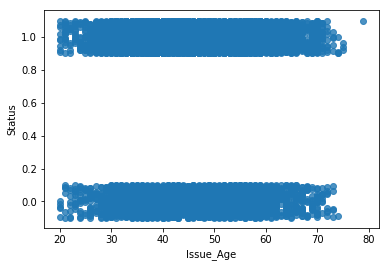

In [14]:
sns.regplot(x="Issue_Age", y="Status", data=df, fit_reg=False, y_jitter=0.1)

In [15]:
def makeUniPlot(xinput):
    sns.regplot(x=xinput, y="Status", data=df, fit_reg=False, y_jitter=0.1, x_jitter=0.1, scatter_kws={"alpha": 0.2})
    plt.show()

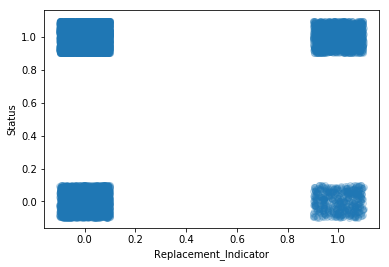

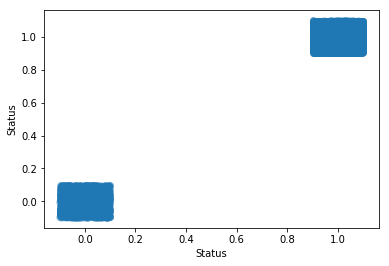

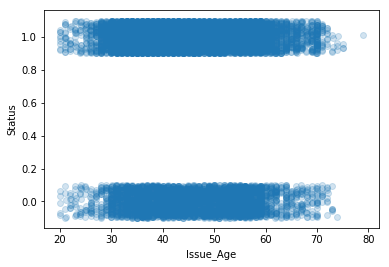

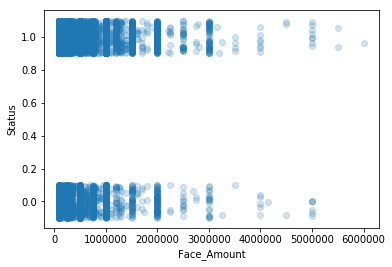

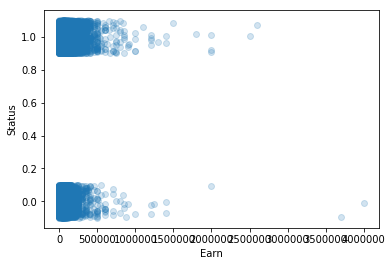

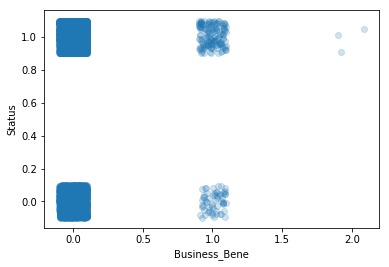

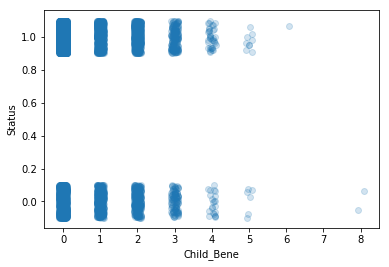

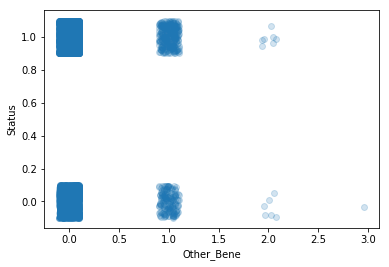

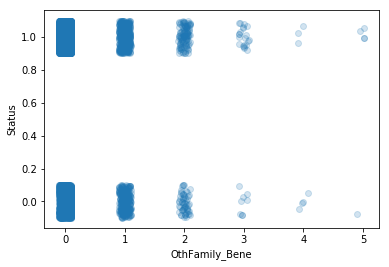

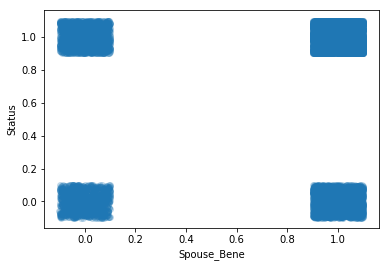

In [16]:
for col in num_cols:
    makeUniPlot(col)

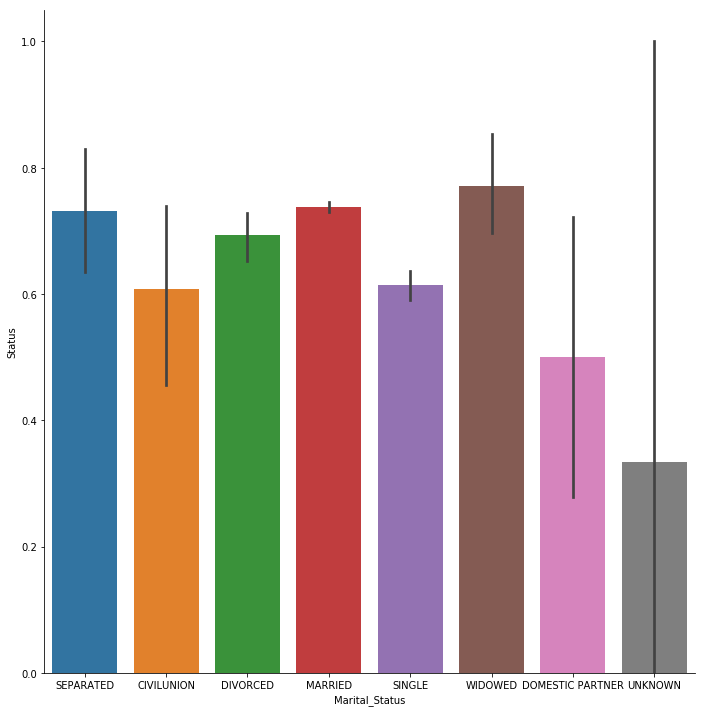

In [17]:
sns.catplot(x="Marital_Status", y="Status", data=df, kind="bar",height=10, aspect=.99)

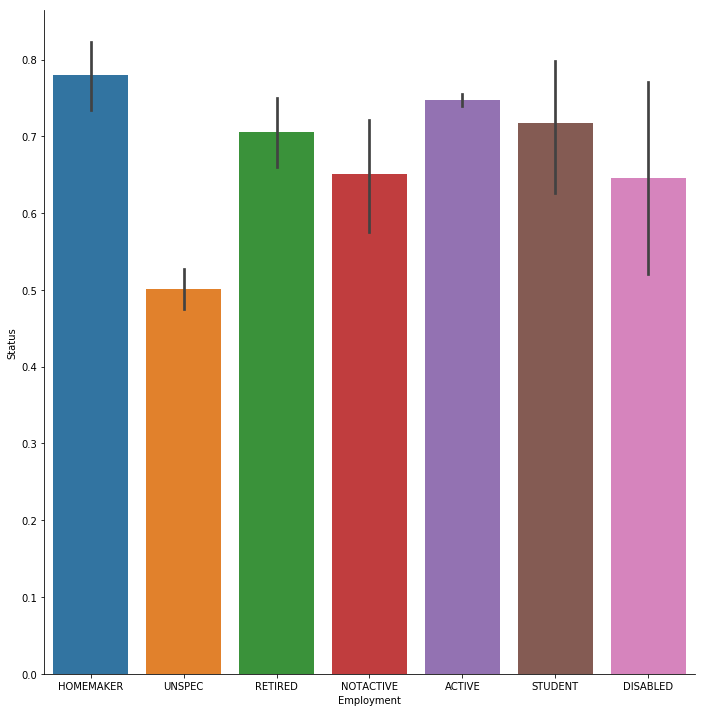

In [18]:
sns.catplot(x="Employment", y="Status", data=df, kind="bar",height=10, aspect=.99)

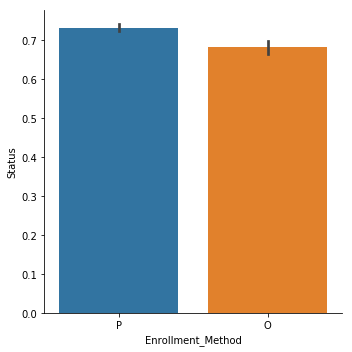

In [19]:
sns.catplot(x="Enrollment_Method", y="Status", data=df, kind="bar")

In [20]:
plt.style.use("seaborn")

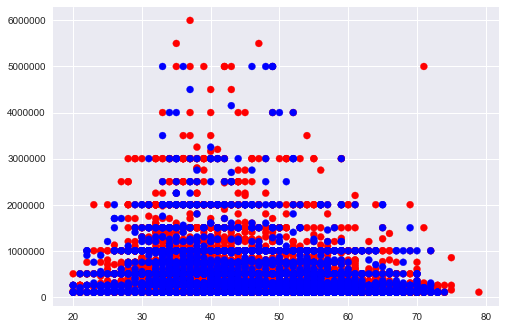

In [21]:
plt.scatter(x=df.Issue_Age, y=df.Face_Amount, c=df.Status, cmap="bwr")

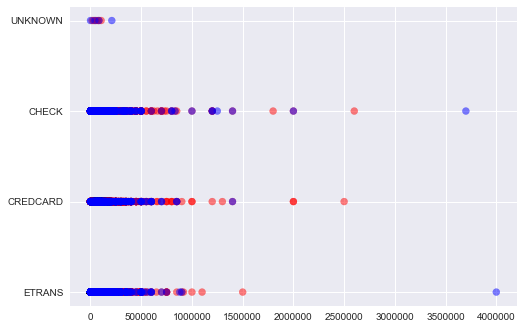

In [22]:
plt.scatter(x=df.Earn, y=df.Payment_Method, c=df.Status, cmap="bwr", alpha=0.5)

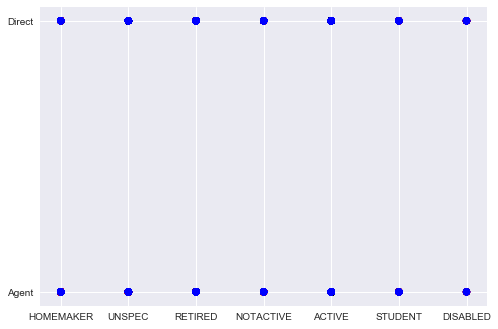

In [23]:
plt.scatter(x=df.Employment, y=df.App_Source, c=df.Status, cmap="bwr")

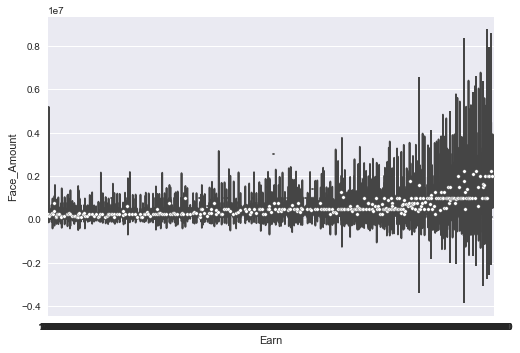

In [24]:
sns.violinplot(x="Earn", y="Face_Amount", data=df)

# 3 Feature Engineering

Recall that we can create some binary indicators as well as dummy variables for some of our features. Also, we noted that some numerical variables, like Pclass, really should be converted to a categorical variable. 

In [25]:
df.dtypes

Enrollment_Method        object
App_Source               object
Payment_Method           object
Replacement_Indicator     int64
Final_Status             object
Status                    int64
Gender                   object
Issue_Age                 int64
Age_Group                object
Marital_Status           object
Employment               object
Face_Amount               int64
Earn                      int64
Earnings_Range           object
Business_Bene             int64
Child_Bene                int64
Other_Bene                int64
OthFamily_Bene            int64
Spouse_Bene               int64
dtype: object

# 4 Feature Selection or Feature Importance

I've done some visual exploration, and I have a sense of which features are good to use. But do they all matter? Should I use all of them? Which ones are the most important?  

As is often the case, the answer to these questions is to use some iteration and math!  

In [26]:
df.columns


Index(['Enrollment_Method', 'App_Source', 'Payment_Method',
       'Replacement_Indicator', 'Final_Status', 'Status', 'Gender',
       'Issue_Age', 'Age_Group', 'Marital_Status', 'Employment', 'Face_Amount',
       'Earn', 'Earnings_Range', 'Business_Bene', 'Child_Bene', 'Other_Bene',
       'OthFamily_Bene', 'Spouse_Bene'],
      dtype='object')

In [27]:
features_to_use = [
    "Enrollment_Method",
    "App_Source",
    "Payment_Method",
    "Issue_Age",
    "Marital_Status",
    "Employment",
    "Earn",
    "Face_Amount",
    "Business_Bene",
    "Child_Bene",
    "Other_Bene",
    "OthFamily_Bene",
    "Spouse_Bene"
]

In [28]:
X = df[features_to_use]

In [29]:
y = df[["Status"]]

In [30]:
X.head()

,Enrollment_Method,App_Source,Payment_Method,Issue_Age,Marital_Status,Employment,Earn,Face_Amount,Business_Bene,Child_Bene,Other_Bene,OthFamily_Bene,Spouse_Bene
0,P,Agent,ETRANS,42,SEPARATED,HOMEMAKER,41667,250000,0,0,0,0,1
1,P,Agent,ETRANS,38,CIVILUNION,UNSPEC,41667,250000,0,2,0,0,0
2,P,Agent,ETRANS,59,DIVORCED,RETIRED,16667,100000,0,1,0,0,1
3,P,Agent,ETRANS,53,DIVORCED,HOMEMAKER,41667,250000,0,4,0,0,0
4,P,Agent,ETRANS,43,DIVORCED,NOTACTIVE,83333,500000,0,0,0,1,0


In [31]:
y.head()

,Status
0,1
1,1
2,1
3,1
4,1


In [32]:
X_encoded = pd.get_dummies(X)

In [33]:
# inital tests for feature importances

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

In [35]:
X_train.shape, X_test.shape

((10836, 31), (3613, 31))

In [36]:
y_train.shape, y_test.shape

((10836, 1), (3613, 1))

In [37]:
X_train.head()

,Issue_Age,Earn,Face_Amount,Business_Bene,Child_Bene,Other_Bene,OthFamily_Bene,Spouse_Bene,Enrollment_Method_O,Enrollment_Method_P,...,Marital_Status_SINGLE,Marital_Status_UNKNOWN,Marital_Status_WIDOWED,Employment_ACTIVE,Employment_DISABLED,Employment_HOMEMAKER,Employment_NOTACTIVE,Employment_RETIRED,Employment_STUDENT,Employment_UNSPEC
4659,41,75000,250000,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
8369,37,150000,500000,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
6444,36,100000,250000,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
10405,30,0,750000,0,0,0,4,0,0,1,...,1,0,0,0,0,0,0,0,0,1
7762,35,125000,1600000,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [38]:
# normalize
sds = StandardScaler()
sds.fit(X_train)
X_train = sds.transform(X_train)
X_test = sds.transform(X_test)

In [39]:
sds

StandardScaler(copy=True, with_mean=True, with_std=True)

In [40]:
joblib.dump(sds, "scaler.model")

['scaler.model']

In [41]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
count,1.083600e+04,1.083600e+04,1.083600e+04,1.083600e+04,1.083600e+04,1.083600e+04,1.083600e+04,1.083600e+04,1.083600e+04,1.083600e+04,...,1.083600e+04,1.083600e+04,1.083600e+04,1.083600e+04,1.083600e+04,1.083600e+04,1.083600e+04,1.083600e+04,1.083600e+04,1.083600e+04
mean,-1.246593e-16,9.075120e-18,-5.624116e-16,-5.113009e-16,4.826130e-16,-9.560920e-16,7.421620e-16,-1.474560e-16,-2.939694e-16,3.182516e-16,...,6.065551e-16,-4.469125e-16,1.412138e-16,2.114301e-16,6.187770e-16,-1.578349e-15,1.361145e-15,3.504231e-16,8.263406e-16,-4.898670e-16
std,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,...,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00
min,-2.486449e+00,-8.270613e-01,-8.948695e-01,-1.307319e-01,-3.827086e-01,-1.832872e-01,-2.357393e-01,-2.005902e+00,-5.379461e-01,-1.858922e+00,...,-3.642025e-01,-1.664126e-02,-8.514939e-02,-2.203210e+00,-5.442303e-02,-1.498568e-01,-1.097643e-01,-1.684524e-01,-8.235591e-02,-3.327178e-01
25%,-8.079441e-01,-4.237805e-01,-5.971321e-01,-1.307319e-01,-3.827086e-01,-1.832872e-01,-2.357393e-01,4.985288e-01,-5.379461e-01,5.379461e-01,...,-3.642025e-01,-1.664126e-02,-8.514939e-02,4.538833e-01,-5.442303e-02,-1.498568e-01,-1.097643e-01,-1.684524e-01,-8.235591e-02,-3.327178e-01
50%,-1.167952e-01,-1.969350e-01,-1.009032e-01,-1.307319e-01,-3.827086e-01,-1.832872e-01,-2.357393e-01,4.985288e-01,-5.379461e-01,5.379461e-01,...,-3.642025e-01,-1.664126e-02,-8.514939e-02,4.538833e-01,-5.442303e-02,-1.498568e-01,-1.097643e-01,-1.684524e-01,-8.235591e-02,-3.327178e-01
75%,7.718249e-01,1.559357e-01,3.953257e-01,-1.307319e-01,-3.827086e-01,-1.832872e-01,-2.357393e-01,4.985288e-01,-5.379461e-01,5.379461e-01,...,-3.642025e-01,-1.664126e-02,-8.514939e-02,4.538833e-01,-5.442303e-02,-1.498568e-01,-1.097643e-01,-1.684524e-01,-8.235591e-02,-3.327178e-01
max,3.338950e+00,3.277967e+01,9.823675e+00,1.510164e+01,1.071303e+01,1.549645e+01,1.394002e+01,4.985288e-01,1.858922e+00,5.379461e-01,...,2.745725e+00,6.009160e+01,1.174407e+01,4.538833e-01,1.837457e+01,6.673036e+00,9.110434e+00,5.936396e+00,1.214242e+01,3.005550e+00


In [42]:
pd.DataFrame(X_test).describe()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
count,3613.000000,3613.000000,3613.000000,3613.000000,3613.000000,3613.000000,3613.000000,3613.000000,3613.000000,3613.000000,...,3613.000000,3.613000e+03,3613.000000,3613.000000,3613.000000,3613.000000,3613.000000,3613.000000,3613.000000,3613.000000
mean,-0.007866,-0.003262,0.012826,-0.048520,-0.004968,-0.028501,0.016152,0.020240,0.014004,-0.014004,...,-0.006126,-1.664126e-02,0.016347,-0.018995,0.027189,0.010660,-0.000030,0.022483,0.005616,-0.000092
std,1.021850,0.846051,0.977977,0.807262,0.972556,0.894645,1.040483,0.984555,1.009249,1.009249,...,0.992797,6.905155e-16,1.091168,1.016442,1.223838,1.034271,1.000002,1.062772,1.033440,1.000015
min,-2.486449,-0.827061,-0.894869,-0.130732,-0.382709,-0.183287,-0.235739,-2.005902,-0.537946,-1.858922,...,-0.364203,-1.664126e-02,-0.085149,-2.203210,-0.054423,-0.149857,-0.109764,-0.168452,-0.082356,-0.332718
25%,-0.807944,-0.423780,-0.597132,-0.130732,-0.382709,-0.183287,-0.235739,0.498529,-0.537946,0.537946,...,-0.364203,-1.664126e-02,-0.085149,0.453883,-0.054423,-0.149857,-0.109764,-0.168452,-0.082356,-0.332718
50%,-0.116795,-0.196935,-0.100903,-0.130732,-0.382709,-0.183287,-0.235739,0.498529,-0.537946,0.537946,...,-0.364203,-1.664126e-02,-0.085149,0.453883,-0.054423,-0.149857,-0.109764,-0.168452,-0.082356,-0.332718
75%,0.771825,0.181141,0.395326,-0.130732,-0.382709,-0.183287,-0.235739,0.498529,-0.537946,0.537946,...,-0.364203,-1.664126e-02,-0.085149,0.453883,-0.054423,-0.149857,-0.109764,-0.168452,-0.082356,-0.332718
max,2.845272,14.295969,10.816133,15.101641,6.552125,10.269873,13.940015,0.498529,1.858922,0.537946,...,2.745725,-1.664126e-02,11.744066,0.453883,18.374575,6.673036,9.110434,5.936396,12.142420,3.005550


In [43]:
pd.DataFrame(X_train).dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
dtype: object

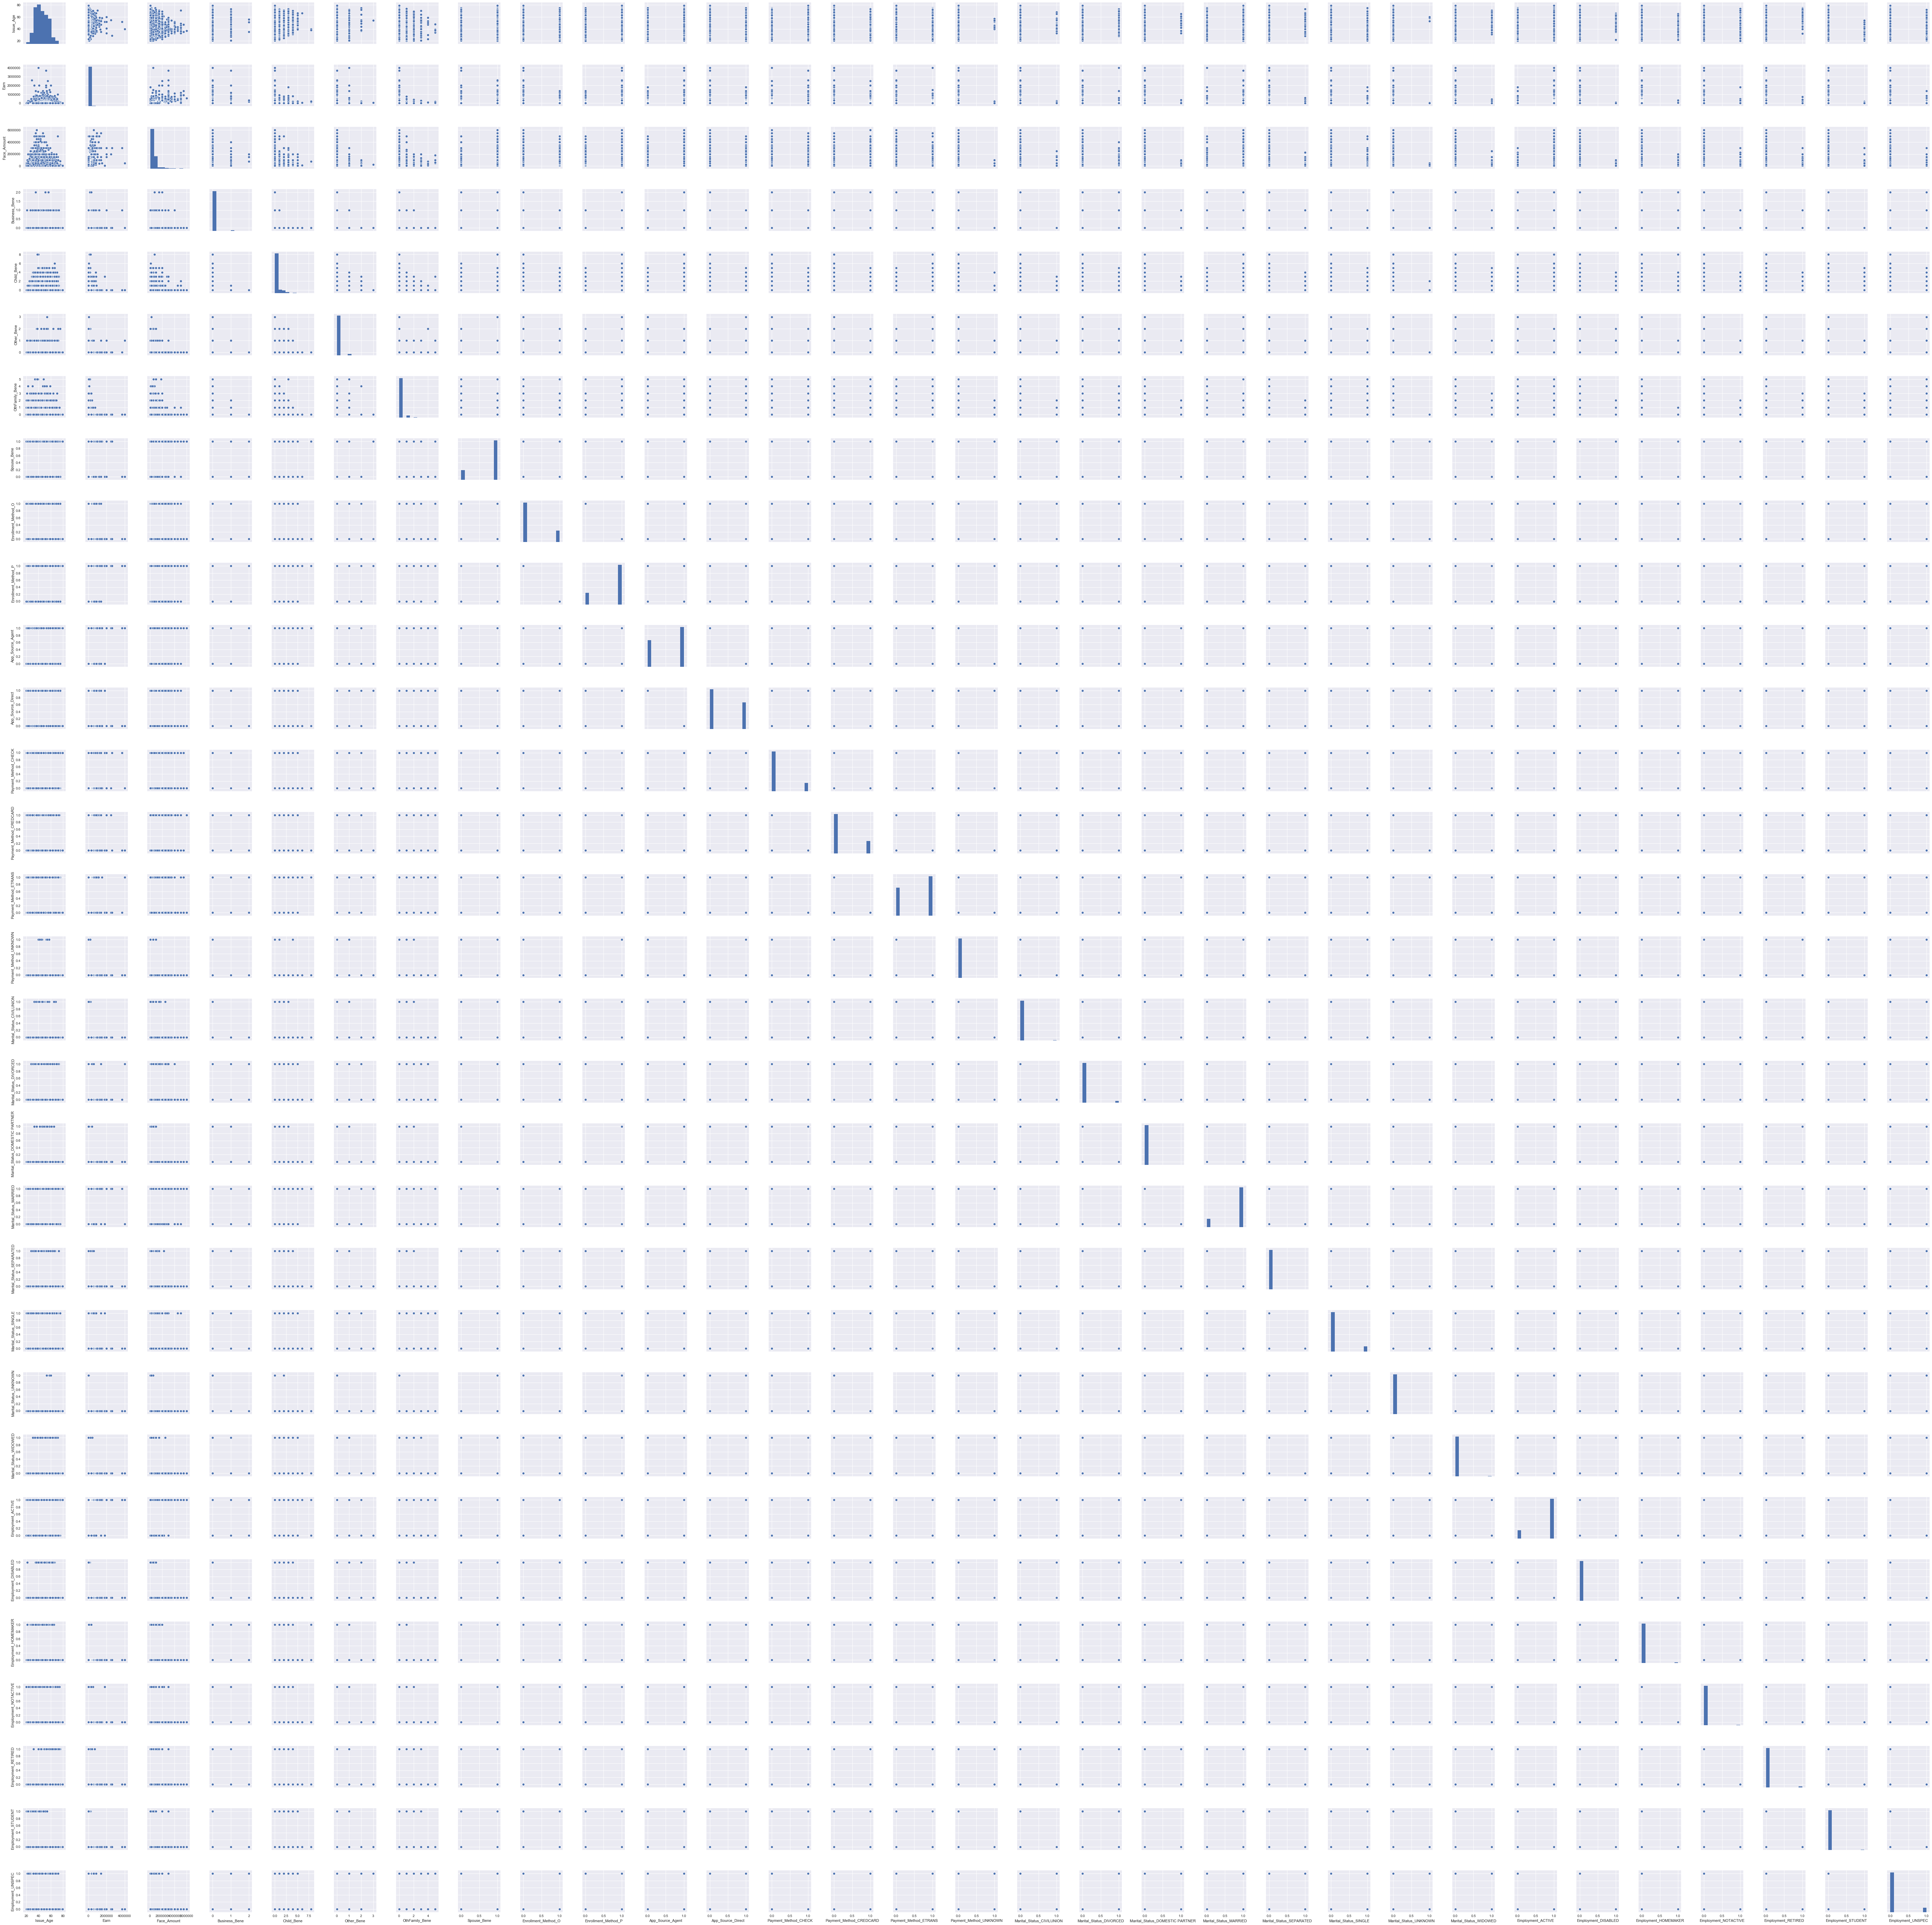

In [44]:
sns.pairplot(X_encoded)

# Stepwise Regression
SL = 0.02
import statsmodels.formula.api as sm
numVars = len(X_encoded.iloc[0])
for i in range(0, numVars):
    #print(numVars)
    print(i)
    regressor_OLS = sm.OLS(y, X_encoded).fit()
    maxVar = max(regressor_OLS.pvalues)
    if maxVar > SL:
        for j in range(0, numVars - i):
            if (regressor_OLS.pvalues[j]== maxVar):
                X_encoded = X_encoded.drop(X_encoded.columns[j],axis=1)
regressor_OLS.summary()

In [45]:
X_encoded.head()

,Issue_Age,Earn,Face_Amount,Business_Bene,Child_Bene,Other_Bene,OthFamily_Bene,Spouse_Bene,Enrollment_Method_O,Enrollment_Method_P,...,Marital_Status_SINGLE,Marital_Status_UNKNOWN,Marital_Status_WIDOWED,Employment_ACTIVE,Employment_DISABLED,Employment_HOMEMAKER,Employment_NOTACTIVE,Employment_RETIRED,Employment_STUDENT,Employment_UNSPEC
0,42,41667,250000,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1,38,41667,250000,0,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,59,16667,100000,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,41667,250000,0,4,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,43,83333,500000,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

In [87]:
for i in range(5):
    
    t0 = time.time()
    clf = RandomForestClassifier(n_estimators=100)
    
    clf.fit(X_train, y_train)
    t1 = time.time()
    
    ypred = clf.predict(X_test)
    scores = roc_auc_score(y_test, ypred)
    
    print(f"Decision tree {i+1} took {t1-t0} seconds to train and got a score of {scores}")
    print()
    print("And here are the top features: ")
    c = X_encoded.columns 
    for cfi in zip(c, clf.feature_importances_):
        print(cfi)
    
    

C:\Users\r2f2h\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Decision tree 1 took 0.7122948169708252 seconds to train and got a score of 0.5659378528616448

And here are the top features: 
('Issue_Age', 0.31698089406418767)
('Earn', 0.4619060382574579)
('Face_Amount', 0.14695623162751176)
('Business_Bene', 0.004844309243721253)
('Child_Bene', 0.04023473492410475)
('Other_Bene', 0.013518017948851078)
('OthFamily_Bene', 0.015559773934165752)


C:\Users\r2f2h\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Decision tree 2 took 0.6805119514465332 seconds to train and got a score of 0.5680027972657931

And here are the top features: 
('Issue_Age', 0.3194704012377633)
('Earn', 0.4638663197667697)
('Face_Amount', 0.14233932790448642)
('Business_Bene', 0.004818667299255768)
('Child_Bene', 0.03996975718986498)
('Other_Bene', 0.014106758961758534)
('OthFamily_Bene', 0.015428767640101378)


C:\Users\r2f2h\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Decision tree 3 took 0.6462810039520264 seconds to train and got a score of 0.5655012169115763

And here are the top features: 
('Issue_Age', 0.31545772590731597)
('Earn', 0.4664587387652076)
('Face_Amount', 0.14194757969120678)
('Business_Bene', 0.005070538807254047)
('Child_Bene', 0.040696659237128084)
('Other_Bene', 0.014102939530449022)
('OthFamily_Bene', 0.01626581806143833)


C:\Users\r2f2h\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Decision tree 4 took 0.6795153617858887 seconds to train and got a score of 0.5600041469737187

And here are the top features: 
('Issue_Age', 0.32344271132327124)
('Earn', 0.45776971171998476)
('Face_Amount', 0.1429190674730163)
('Business_Bene', 0.00508943768624994)
('Child_Bene', 0.04031095936487505)
('Other_Bene', 0.015226652760411654)
('OthFamily_Bene', 0.015241459672190682)


C:\Users\r2f2h\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Decision tree 5 took 0.6636881828308105 seconds to train and got a score of 0.5615215976565715

And here are the top features: 
('Issue_Age', 0.3220893755082389)
('Earn', 0.45459043171825925)
('Face_Amount', 0.1462882040362576)
('Business_Bene', 0.005261994238914666)
('Child_Bene', 0.04193171332286607)
('Other_Bene', 0.01368861886753113)
('OthFamily_Bene', 0.01614966230793213)


In [48]:
ypred=ypred.reshape(3613,1)

In [49]:
clf.class_weight

In [50]:
y_test.shape

(3613, 1)

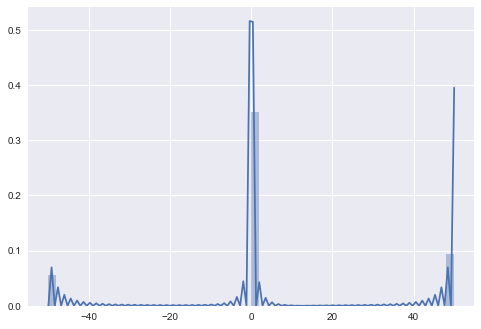

In [51]:
sns.distplot((ypred-y_test)*50,bins=50)

In [52]:
features_to_use = [
    "Issue_Age",
    "Earn",
    "Face_Amount",
    "Business_Bene",
    "App_Source_Agent",
    "Payment_Method_CHECK",
    "Employment_ACTIVE",
]

# 5 Model Selection, Model Benchmark

In [53]:
X_encoded[features_to_use].shape

(14449, 7)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded[features_to_use], y, random_state=42)

In [55]:
pd.concat([X_train, y_train], axis=1).head()

,Issue_Age,Earn,Face_Amount,Business_Bene,App_Source_Agent,Payment_Method_CHECK,Employment_ACTIVE,Status
4659,41,75000,250000,0,1,0,1,1
8369,37,150000,500000,0,1,0,1,1
6444,36,100000,250000,0,0,0,1,1
10405,30,0,750000,0,0,0,0,1
7762,35,125000,1600000,0,0,0,1,1


In [56]:
sds = StandardScaler()
sds.fit(X_train)
X_train = sds.transform(X_train)
X_test = sds.transform(X_test)

In [57]:
np.mean(X_train, axis=0)

array([-9.50800080e-17,  1.18030355e-17, -1.60652427e-17,  1.31144839e-17,
        1.04915871e-17, -1.57373806e-17, -1.18030355e-17])

In [58]:
np.mean(X_test, axis=0)

array([-0.00786631, -0.00326199,  0.01282649, -0.04852007, -0.00466867,
       -0.00670368, -0.01899544])

In [59]:
sds.mean_

array([4.51829088e+01, 9.84399489e+04, 5.50835000e+05, 1.71650055e-02,
       5.99298634e-01, 1.73588040e-01, 8.29180509e-01])

In [60]:
sds.var_

array([1.02577655e+02, 1.41666559e+10, 2.53814182e+11, 1.72395080e-02,
       2.40139781e-01, 1.43455232e-01, 1.41640192e-01])

In [61]:
joblib.dump(sds, "scaler.model")

['scaler.model']

In [62]:
def modelbench(classifier, X_train, Y_train):
    
    rs = ShuffleSplit(n_splits=3, test_size=.33)
    
    rs.get_n_splits(X_train)
    
    Y_train = Y_train.values
    Y_train = Y_train.ravel()

    for train_idx, test_idx in rs.split(X_train):
        ssX_train, ssX_test = X_train[train_idx], X_train[test_idx]
        ssy_train, ssy_test = Y_train[train_idx], Y_train[test_idx]

        t0 = time.time()
        
        clf = classifier
        clf.fit(X=ssX_train, y=ssy_train)

        ypred = clf.predict(ssX_test)

        scores = roc_auc_score(ssy_test, ypred)
    
        t1 = time.time()
    
        print(f"{classifier} \n took {t1-t0} seconds to run and got a score of {scores}")
        print()

In [63]:
modelbench(DecisionTreeClassifier(), X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 
 took 0.017323732376098633 seconds to run and got a score of 0.534674676101194

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 
 took 0.03224301338195801 seconds to run and got a score of 0.5281409948157858

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
          

In [64]:
modelbench(LogisticRegression(), X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 
 took 0.027277469635009766 seconds to run and got a score of 0.5274594898610646

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 
 took 0.019840002059936523 seconds to run and got a score of 0.5288876504293004

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 
 took 0.010416269302368164 seconds to ru

In [65]:
modelbench(RandomForestClassifier(), X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
 took 0.09277081489562988 seconds to run and got a score of 0.5476276232515569

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
 took 0.05455613136291504 seconds to run and got a score of 0.54792503428683

In [66]:
modelbench(RandomForestClassifier(n_estimators=50), X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
 took 0.29660701751708984 seconds to run and got a score of 0.5477065969384975

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
 took 0.25745391845703125 seconds to run and got a score of 0.54666815863191

In [67]:
modelbench(RandomForestClassifier(n_estimators=100), X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
 took 0.5491015911102295 seconds to run and got a score of 0.5358903427914276

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
 took 0.5232486724853516 seconds to run and got a score of 0.54384039935492

In [68]:
modelbench(SVC(kernel="linear"), X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 
 took 0.5858149528503418 seconds to run and got a score of 0.5

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 
 took 0.5585334300994873 seconds to run and got a score of 0.5

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 
 took 0.6125979423522949 seconds to run and got a score of 0.5



In [69]:
modelbench(SVC(kernel="sigmoid"), X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 
 took 1.5832536220550537 seconds to run and got a score of 0.5243102703852724

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 
 took 1.3759024143218994 seconds to run and got a score of 0.5128981695954301

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 
 took 1.466134786605835 seconds to run and got a score of 0.5185628619087196



# 6 RandomForest is Awesome, and It's Fast Enough! So It's Time to Tune!

Doing so using GridSearch

In [70]:
params = {
    "max_depth": [2,4,6,8,10],
    "min_samples_split": [5, 9, 19],
    "min_samples_leaf": [2, 5, 10],
    "max_leaf_nodes": [15, 20, 50],
}

In [71]:
grid = GridSearchCV(RandomForestClassifier(n_estimators=10), params, cv=5)

In [72]:
grid

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [5, 9, 19], 'min_samples_leaf': [2, 5, 10], 'max_leaf_nodes': [15, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [73]:
grid.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [5, 9, 19], 'min_samples_leaf': [2, 5, 10], 'max_leaf_nodes': [15, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [74]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [75]:
grid.best_params_

{'max_depth': 4,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 10,
 'min_samples_split': 5}

In [76]:
n_trees = [10,25,50,75,100,150,200]

train_auc = []
test_auc = []

for i in n_trees:
    clf = RandomForestClassifier(n_estimators=i, random_state=1)
    
    clf.fit(X_train, y_train.values.ravel())
    train_auc.append(roc_auc_score(y_train, clf.predict(X_train)))
    test_auc.append(roc_auc_score(y_test, clf.predict(X_test)))
    
train_auc, test_auc

([0.9191267069780105,
  0.9303147007222712,
  0.9371376927464182,
  0.9375933620637127,
  0.9369626536606632,
  0.9356719690578834,
  0.9359698193508328],
 [0.5655043232589312,
  0.5621263646572223,
  0.5663350770296485,
  0.5611600964831489,
  0.5648570381288607,
  0.5634541340047186,
  0.5667144397003618])

In [77]:
n_trees = [10,25,50,75,100,150,200]

train_auc = []
test_auc = []

for i in n_trees:
    clf = RandomForestClassifier(max_depth=10, n_estimators=i, random_state=1)
    
    clf.fit(X_train, y_train.values.ravel())
    train_auc.append(roc_auc_score(y_train, clf.predict(X_train)))
    test_auc.append(roc_auc_score(y_test, clf.predict(X_test)))
    

In [78]:
train_auc, test_auc

([0.6054043743497535,
  0.6088689497818855,
  0.6123564852958968,
  0.6119650915924343,
  0.6120586350029475,
  0.6114043988236868,
  0.6115972256651833],
 [0.5510046703932481,
  0.5418894823738085,
  0.5423439798211676,
  0.5417570743178073,
  0.5439938385600216,
  0.545529150740165,
  0.5480880043737371])

In [79]:
n_trees = [10,25,50,75,100,150]

train_auc = []
test_auc = []

for i in n_trees:
    clf = RandomForestClassifier(max_depth=10, max_leaf_nodes=20, n_estimators=i, random_state=1)
    
    clf.fit(X_train, y_train.values.ravel())
    train_auc.append(roc_auc_score(y_train, clf.predict(X_train)))
    test_auc.append(roc_auc_score(y_test, clf.predict(X_test)))

train_auc, test_auc

([0.5400679921193935,
  0.5310504199613437,
  0.529753427643762,
  0.5282463884232744,
  0.5268621604099812,
  0.5297126798061412],
 [0.5345423884394176,
  0.5241388428545468,
  0.5257314283140455,
  0.5248975681959732,
  0.5232298479598287,
  0.5228504852891155])

In [80]:
n_trees = [10,25,50,75,100,150]

train_auc = []
test_auc = []

for i in n_trees:
    clf = RandomForestClassifier(max_depth=10, max_leaf_nodes=20, min_samples_split=9,
                                 n_estimators=i, random_state=1)
    
    clf.fit(X_train, y_train.values.ravel())
    train_auc.append(roc_auc_score(y_train, clf.predict(X_train)))
    test_auc.append(roc_auc_score(y_test, clf.predict(X_test)))

train_auc, test_auc

([0.5405179214162182,
  0.5286498298620087,
  0.530734781912653,
  0.5299462544852583,
  0.5282699161994857,
  0.5300105300990905],
 [0.531299944241065,
  0.5213724463883276,
  0.5254844736993336,
  0.5255417469786889,
  0.5238740267425444,
  0.5243857974692587])

In [81]:
n_trees = [10,25,50,75,100,150]

train_auc = []
test_auc = []

for i in n_trees:
    clf = RandomForestClassifier(max_depth=10, max_leaf_nodes=20, min_samples_split=9,
                                 n_estimators=i)
    
    clf.fit(X_train, y_train.values.ravel())
    train_auc.append(roc_auc_score(y_train, clf.predict(X_train)))
    test_auc.append(roc_auc_score(y_test, clf.predict(X_test)))

train_auc, test_auc

([0.526027145124496,
  0.527417680852591,
  0.5321138375998086,
  0.5289298923992163,
  0.5304489793549756,
  0.5329253251090824],
 [0.5237988919658986,
  0.5178867363627468,
  0.5211827650529709,
  0.5264328803761165,
  0.5220738984503985,
  0.5255596084759794])

Doing some manual checks

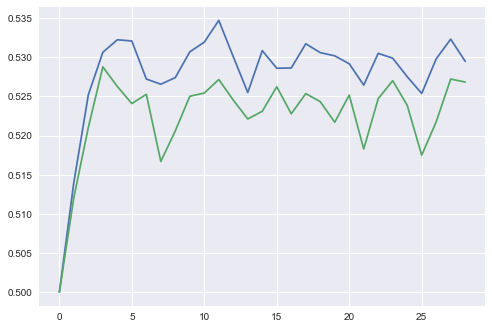

In [82]:
train_auc = []
test_auc = []

for i in range(1,30):
    clf = RandomForestClassifier(max_depth=i, max_leaf_nodes=20, min_samples_split=9,
                                 n_estimators=25)
    
    clf.fit(X_train, y_train.values.ravel())
    train_auc.append(roc_auc_score(y_train, clf.predict(X_train)))
    test_auc.append(roc_auc_score(y_test, clf.predict(X_test)))

train_auc, test_auc

plt.plot(range(29), train_auc)
plt.plot(range(29), test_auc)

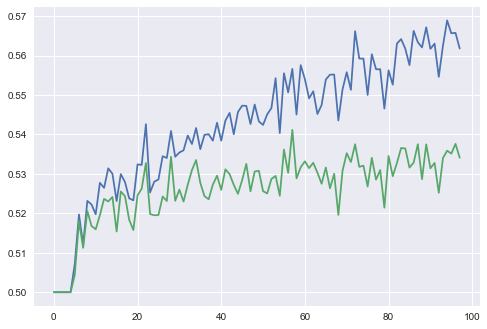

In [83]:
train_auc = []
test_auc = []

for i in range(2,100):
    clf = RandomForestClassifier(max_depth=15, max_leaf_nodes=i, min_samples_split=9,
                                 n_estimators=25)
    
    clf.fit(X_train, y_train.values.ravel())
    train_auc.append(roc_auc_score(y_train, clf.predict(X_train)))
    test_auc.append(roc_auc_score(y_test, clf.predict(X_test)))

train_auc, test_auc

plt.plot(range(98), train_auc)
plt.plot(range(98), test_auc)

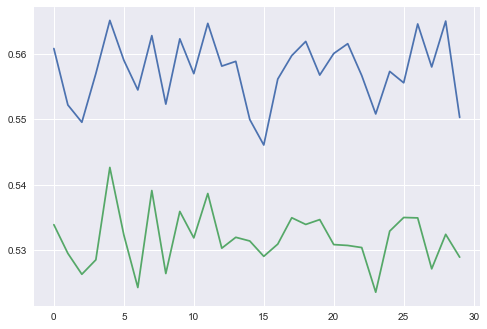

In [84]:
train_auc = []
test_auc = []

for i in range(30):
    clf = RandomForestClassifier(max_depth=15, max_leaf_nodes=80, min_samples_split=9,
                                 n_estimators=25)
    
    clf.fit(X_train, y_train.values.ravel())
    train_auc.append(roc_auc_score(y_train, clf.predict(X_train)))
    test_auc.append(roc_auc_score(y_test, clf.predict(X_test)))

train_auc, test_auc

plt.plot(range(30), train_auc)
plt.plot(range(30), test_auc)

# Step wise regression gave the best results for us, around 58% (above around cell 44)